<a href="https://colab.research.google.com/github/AlanJack48/Corona-tweets-classification/blob/main/CoronaTweetClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#nltk

import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
import string
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [4]:
train = pd.read_csv('Corona_NLP_train.csv',encoding='latin-1')
test = pd.read_csv('Corona_NLP_test.csv',encoding='latin-1')


In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


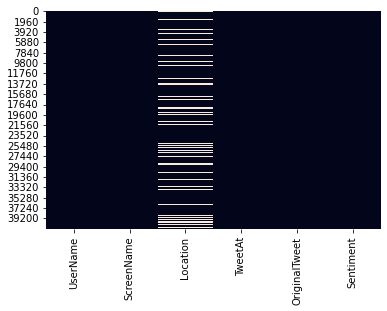

In [6]:
sns.heatmap(train.isnull(),cbar=False)

In [7]:
train.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

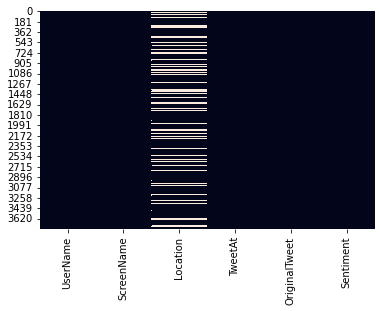

In [8]:
sns.heatmap(test.isnull(),cbar=False)

In [9]:
test.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [10]:
test.groupby('Sentiment').count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,592,592,449,592,592
Extremely Positive,599,599,482,599,599
Negative,1041,1041,811,1041,1041
Neutral,619,619,497,619,619
Positive,947,947,725,947,947


In [11]:
#character_count

train['char_count'] = train['OriginalTweet'].apply(lambda x : len(str(x)))
train['char_count']

0        111
1        237
2        131
3        306
4        310
        ... 
41152    102
41153    138
41154    136
41155    111
41156    255
Name: char_count, Length: 41157, dtype: int64

In [12]:
#mention_count
train['mention_count'] = train['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
train['mention_count']

0        3
1        0
2        0
3        0
4        0
        ..
41152    0
41153    0
41154    2
41155    0
41156    1
Name: mention_count, Length: 41157, dtype: int64

In [13]:
test['char_count'] = test['OriginalTweet'].apply(lambda x : len(str(x)))
test['mention_count'] = test['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [14]:
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0
...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0


In [15]:
train.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
char_count        int64
mention_count     int64
dtype: object

In [16]:
#stringtoint
Ch_Tweet = train['TweetAt'].str.split("-",n=2,expand =True)
train['year'] = Ch_Tweet[2].astype(int)
train['month'] = Ch_Tweet[1].astype(int)
train['day'] = Ch_Tweet[0].astype(int)
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111,0,2020,4,14


In [17]:
Ch_Tweet = test['TweetAt'].str.split("-",n=2,expand =True)
test['year'] = Ch_Tweet[2].astype(int)
test['month'] = Ch_Tweet[1].astype(int)
test['day'] = Ch_Tweet[0].astype(int)
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0,2020,3,2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0,2020,3,2
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0,2020,3,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0,2020,3,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0,2020,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0,2020,3,16
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0,2020,3,16
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2,2020,3,16
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0,2020,3,16


In [18]:
test.dtypes

UserName          int64
ScreenName        int64
Location         object
TweetAt          object
OriginalTweet    object
Sentiment        object
char_count        int64
mention_count     int64
year              int64
month             int64
day               int64
dtype: object

In [19]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

test['OriginalTweet'] = test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))

train['OriginalTweet'] = train['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))


In [20]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))



In [21]:
train['OriginalTweet'].head()

0                @MeNyrbie @Phil_Gahan @Chrisitv      
1    advice Talk neighbours family exchange phone n...
2    Coronavirus Australia: Woolworths give elderly...
3    My food stock one empty... PLEASE, panic, THER...
4    Me, ready go supermarket #COVID19 outbreak. No...
Name: OriginalTweet, dtype: object

In [22]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

In [23]:
train['OriginalTweet']

0                        MeNyrbie PhilGahan Chrisitv      
1        advice Talk neighbours family exchange phone n...
2        Coronavirus Australia Woolworths give elderly ...
3        My food stock one empty PLEASE panic THERE WIL...
4        Me ready go supermarket COVID19 outbreak Not I...
                               ...                        
41152    Airline pilots offering stock supermarket shel...
41153    Response complaint provided citing COVID19 rel...
41154    You know itÂs getting tough KameronWilds rati...
41155    Is wrong smell hand sanitizer starting turn on...
41156    TartiiCat Well newused Rift S going 70000 Amaz...
Name: OriginalTweet, Length: 41157, dtype: object

In [24]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','', data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

In [25]:
train['OriginalTweet'].head(5)

0                    MeNyrbie PhilGahan Chrisitv      
1    advice Talk neighbours family exchange phone n...
2    Coronavirus Australia Woolworths give elderly ...
3    My food stock one empty PLEASE panic THERE WIL...
4    Me ready go supermarket COVID outbreak Not Im ...
Name: OriginalTweet, dtype: object

In [26]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock one empty PLEASE panic THERE WIL...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,Me ready go supermarket COVID outbreak Not Im ...,Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering stock supermarket shel...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response complaint provided citing COVID relat...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough KameronWilds rati...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is wrong smell hand sanitizer starting turn on...,Neutral,111,0,2020,4,14


In [27]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
train['OriginalTweet'] = train['OriginalTweet'].apply(tokenizer.tokenize)

test['OriginalTweet'] = test['OriginalTweet'].apply(tokenizer.tokenize)

In [28]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    data = [st.stem(word) for word in data]
    return data
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: stemming_on_text(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: stemming_on_text(x))

In [29]:
train['Sentiment']=train['Sentiment'].replace('Extremely Positive','Positive')
train['Sentiment']=train['Sentiment'].replace('Extremely Negative','Negative')

test['Sentiment']=test['Sentiment'].replace('Extremely Positive','Positive')
test['Sentiment']=test['Sentiment'].replace('Extremely Negative','Negative')

In [30]:
train['Sentiment']

0         Neutral
1        Positive
2        Positive
3        Positive
4        Negative
           ...   
41152     Neutral
41153    Negative
41154    Positive
41155     Neutral
41156    Negative
Name: Sentiment, Length: 41157, dtype: object

In [31]:
train1=train
train1.Sentiment=train1.Sentiment.replace('Neutral',1)
train1.Sentiment=train1.Sentiment.replace('Positive',2)
train1.Sentiment=train1.Sentiment.replace('Negative',0)

In [32]:
train=train.drop(columns=['ScreenName','Location','TweetAt','year'])
test=test.drop(columns=['ScreenName','Location','TweetAt','year'])

In [33]:
y_train=train['Sentiment']
y_test=test['Sentiment']
X_train=train.drop("Sentiment",axis=1)
X_test=test.drop("Sentiment",axis=1)

In [34]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(41157, 6) (41157,) (3798, 6) (3798,)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [36]:
y_train

0        1
1        2
2        2
3        2
4        0
        ..
41152    1
41153    0
41154    2
41155    1
41156    0
Name: Sentiment, Length: 41157, dtype: int64

In [37]:
X=X_train.OriginalTweet
y=y_train

In [38]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
word_index = tok.word_index
sequences_matrix

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,   41, 1039,   98],
       [   0,    0,    0, ...,  122,    1,   88],
       ...,
       [   0,    0,    0, ...,   28,   29,  301],
       [   0,    0,    0, ...,    2,    1,    2],
       [   0,    0,    0, ...,  772,    1,  255]], dtype=int32)

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [41]:
#rnn model
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     200,
                     input_length=max_len))
model.add(SimpleRNN(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss =SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 200)          9650200   
                                                                 
 simple_rnn (SimpleRNN)      (None, 200)               80200     
                                                                 
 dense (Dense)               (None, 3)                 603       
                                                                 
Total params: 9,731,003
Trainable params: 9,731,003
Non-trainable params: 0
_________________________________________________________________


In [42]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
def roc_auc(predictions,target):
   fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
   roc_auc = metrics.auc(fpr, tpr)
   return roc_auc

In [57]:
model.fit(X_train, y_train, epochs=10) 

Epoch 1/10
901/901 [==============================] - 353s 391ms/step - loss: 0.8116 - accuracy: 0.6481
Epoch 2/10
901/901 [==============================] - 354s 392ms/step - loss: 0.8522 - accuracy: 0.6200
Epoch 3/10
901/901 [==============================] - 352s 391ms/step - loss: 0.8454 - accuracy: 0.6156
Epoch 4/10
901/901 [==============================] - 353s 392ms/step - loss: 0.7518 - accuracy: 0.6832
Epoch 5/10
901/901 [==============================] - 354s 393ms/step - loss: 0.7181 - accuracy: 0.7028
Epoch 6/10
901/901 [==============================] - 353s 391ms/step - loss: 0.6616 - accuracy: 0.7351
Epoch 7/10
901/901 [==============================] - 351s 390ms/step - loss: 0.5855 - accuracy: 0.7816
Epoch 8/10
901/901 [==============================] - 353s 392ms/step - loss: 0.6880 - accuracy: 0.7265
Epoch 9/10
901/901 [==============================] - 353s 392ms/step - loss: 0.6832 - accuracy: 0.7190
Epoch 10/10
901/901 [==============================] - 355s 394m

In [58]:
y_test

array([2, 0, 0, ..., 0, 2, 0])

In [59]:
scores = model.predict(X_test)

386/386 [==============================] - 29s 76ms/step


In [60]:
scores

array([[0.23329102, 0.16299245, 0.8559504 ],
       [0.831672  , 0.67674446, 0.14614274],
       [0.97088075, 0.4535569 , 0.56678003],
       ...,
       [0.20631811, 0.06067627, 0.7142417 ],
       [0.05967321, 0.04319861, 0.60615146],
       [0.6114018 , 0.12194334, 0.4762329 ]], dtype=float32)

In [61]:
score=[]
for s in scores:
    score+=[int(np.where(s == s.max())[0])]
score

[2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 2,
 1,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 0,
 2,
 2,
 2,


In [62]:
from sklearn import metrics

acc=metrics.accuracy_score(score,y_test)
acc

0.7031908001295757

In [63]:
len(score)

12348